# Company Bankruptcy Prediction

### Cel biznesowy
Predykcja brankructwa firm na podstawie parametrów ekonomicznych

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from scipy.stats import randint
from sklearn.exceptions import FitFailedWarning
import warnings


In [63]:
db_raw = pd.read_csv('./db/data.csv') 
db_raw.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## EDA

Sprawdzenie wartości null w danych kolumnach

**Wniosek**: brak wratości null

In [64]:
db_raw.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [65]:
db_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Sprawdzenie ile firm zbankrutowało, a ile nie

In [66]:
db_raw['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Wyrzucenie ' Net Income Flag' - 0 dla każdego recordu

In [67]:
db = db_raw.drop([' Net Income Flag'], axis=1)

Podzielenie na zbiór treningowy i walidacyjny do sprawdzenia poprawności założeń


In [68]:
target = db['Bankrupt?']
db = db.drop(['Bankrupt?'], axis=1)

In [69]:
x_temp, x_valid, y_temp, y_valid = train_test_split(db, target, test_size=0.3, stratify = target, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x_temp, y_temp, test_size=0.3, stratify = y_temp, random_state = 42)

Sprawdzenie zależności miedzy bankrupctwem a pozostałymi parametrami celem wyszczególenia tych najbardziej istotnych

Za pomocą boxplot

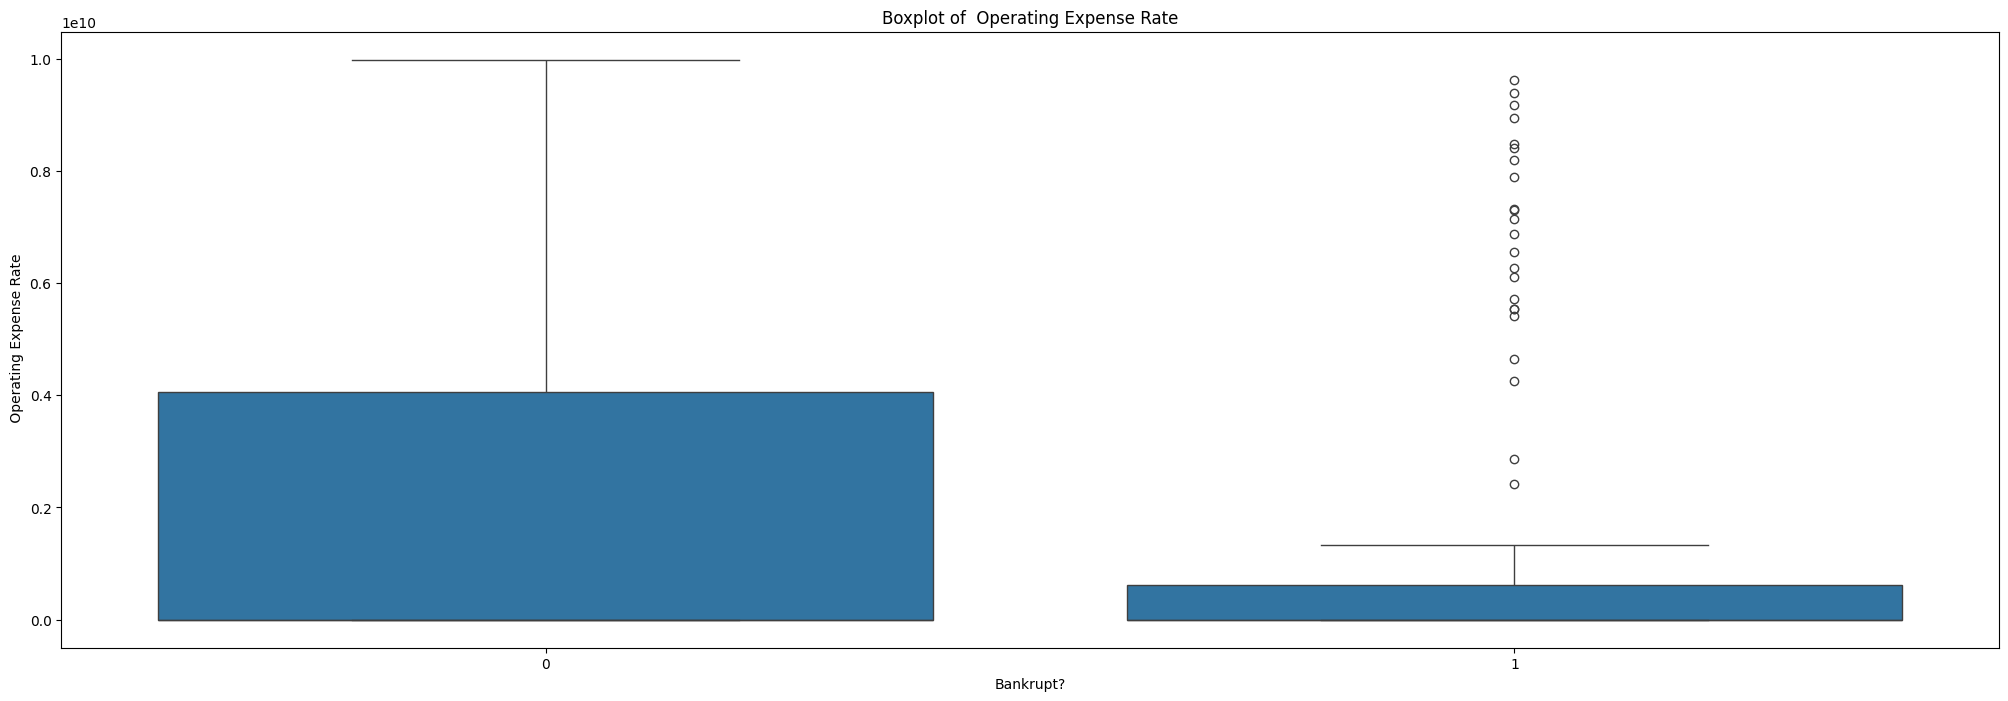

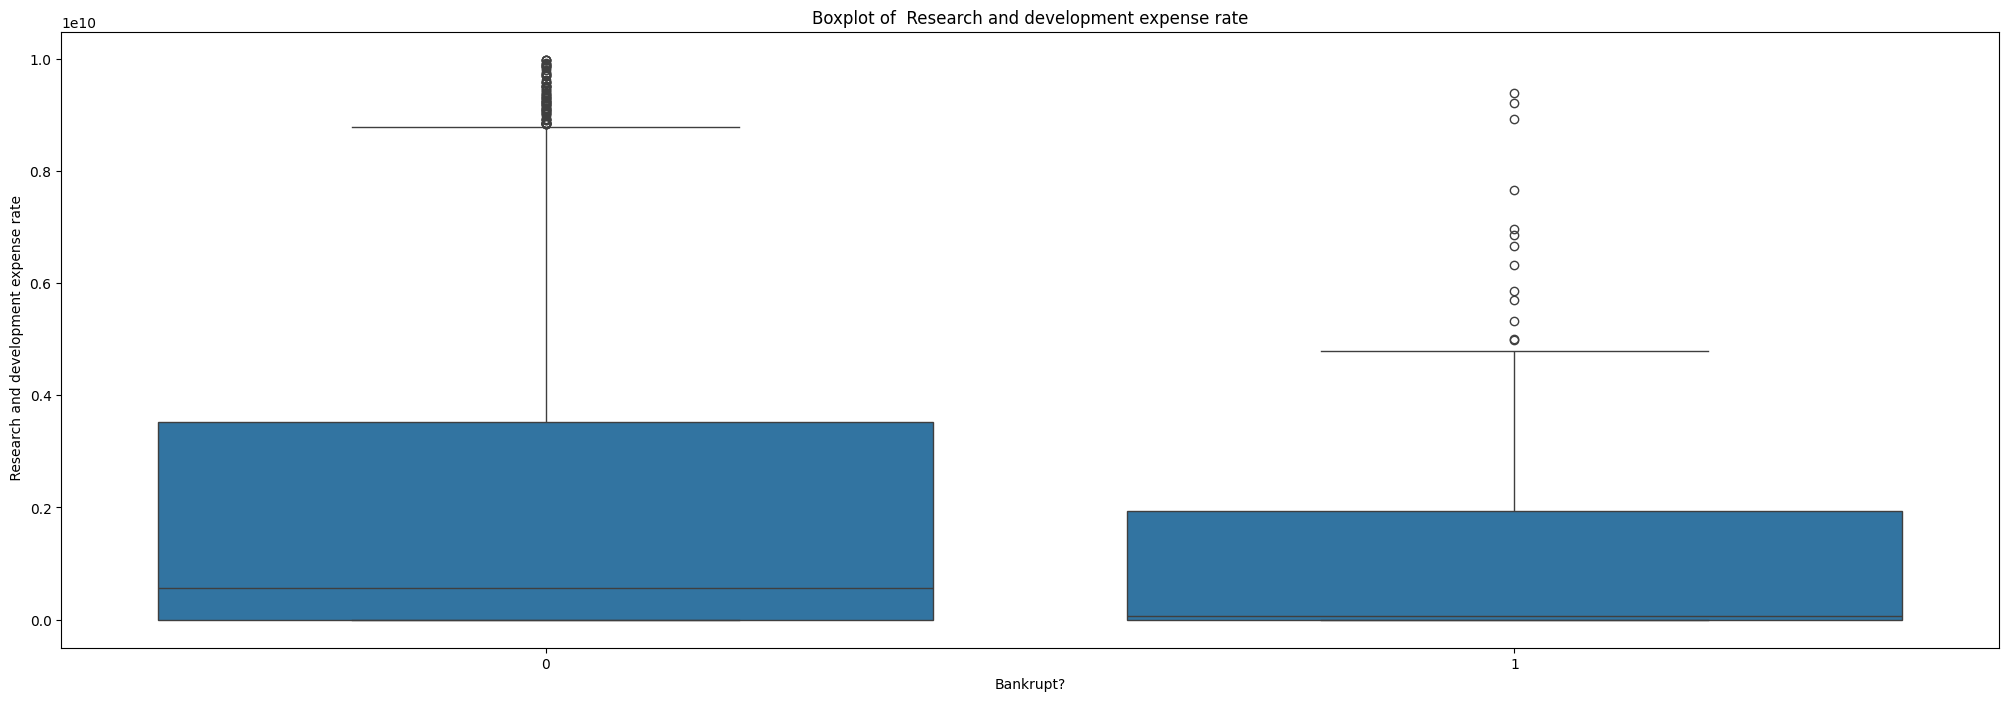

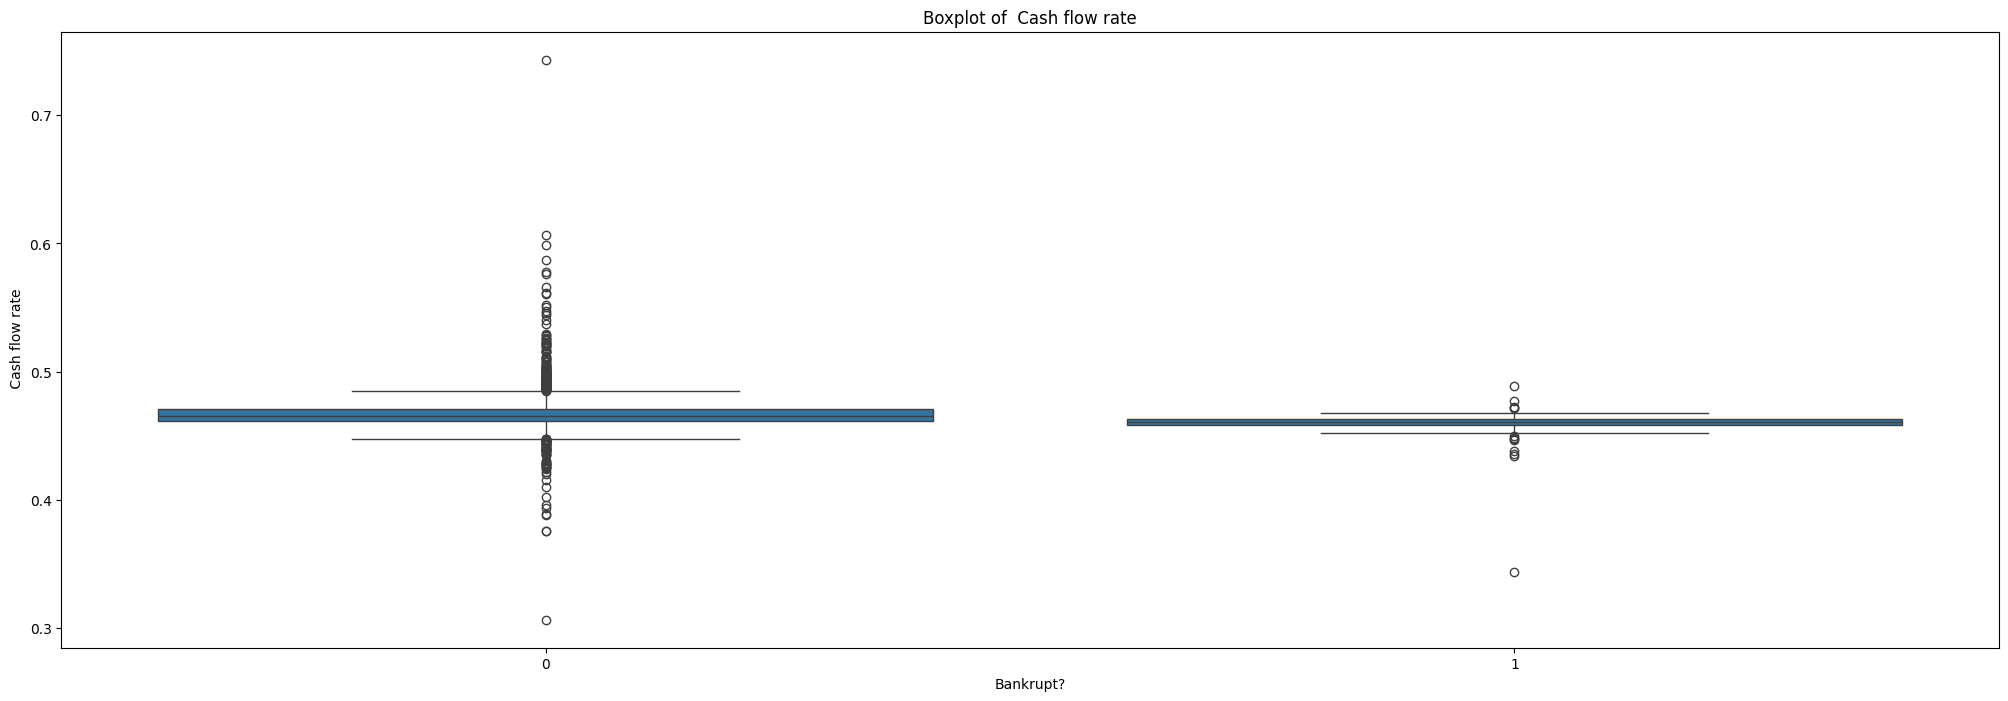

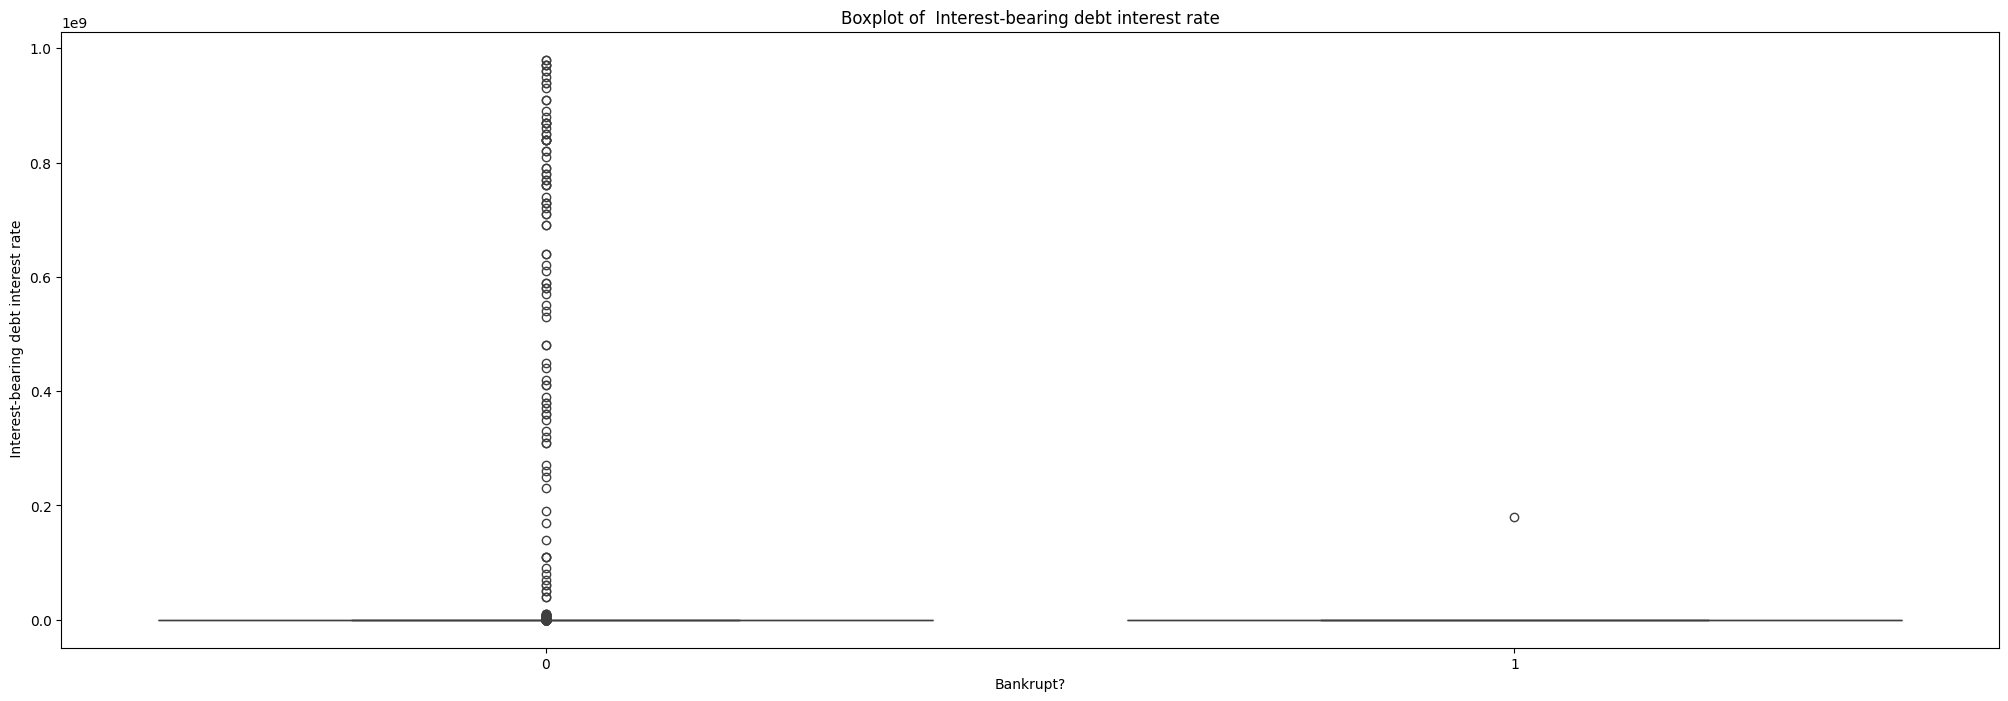

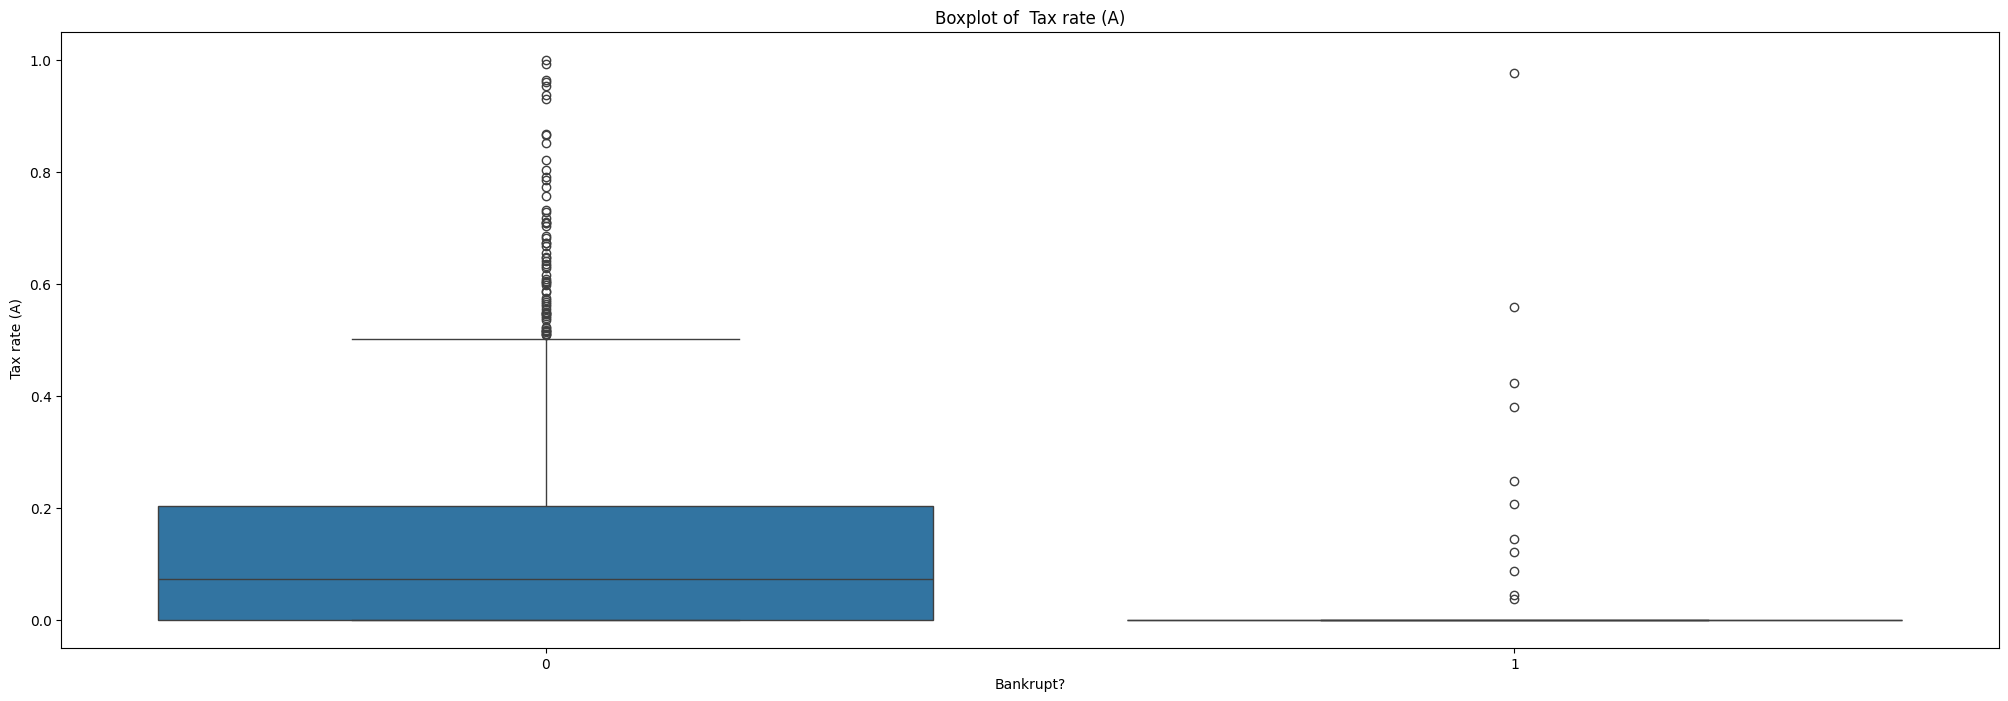

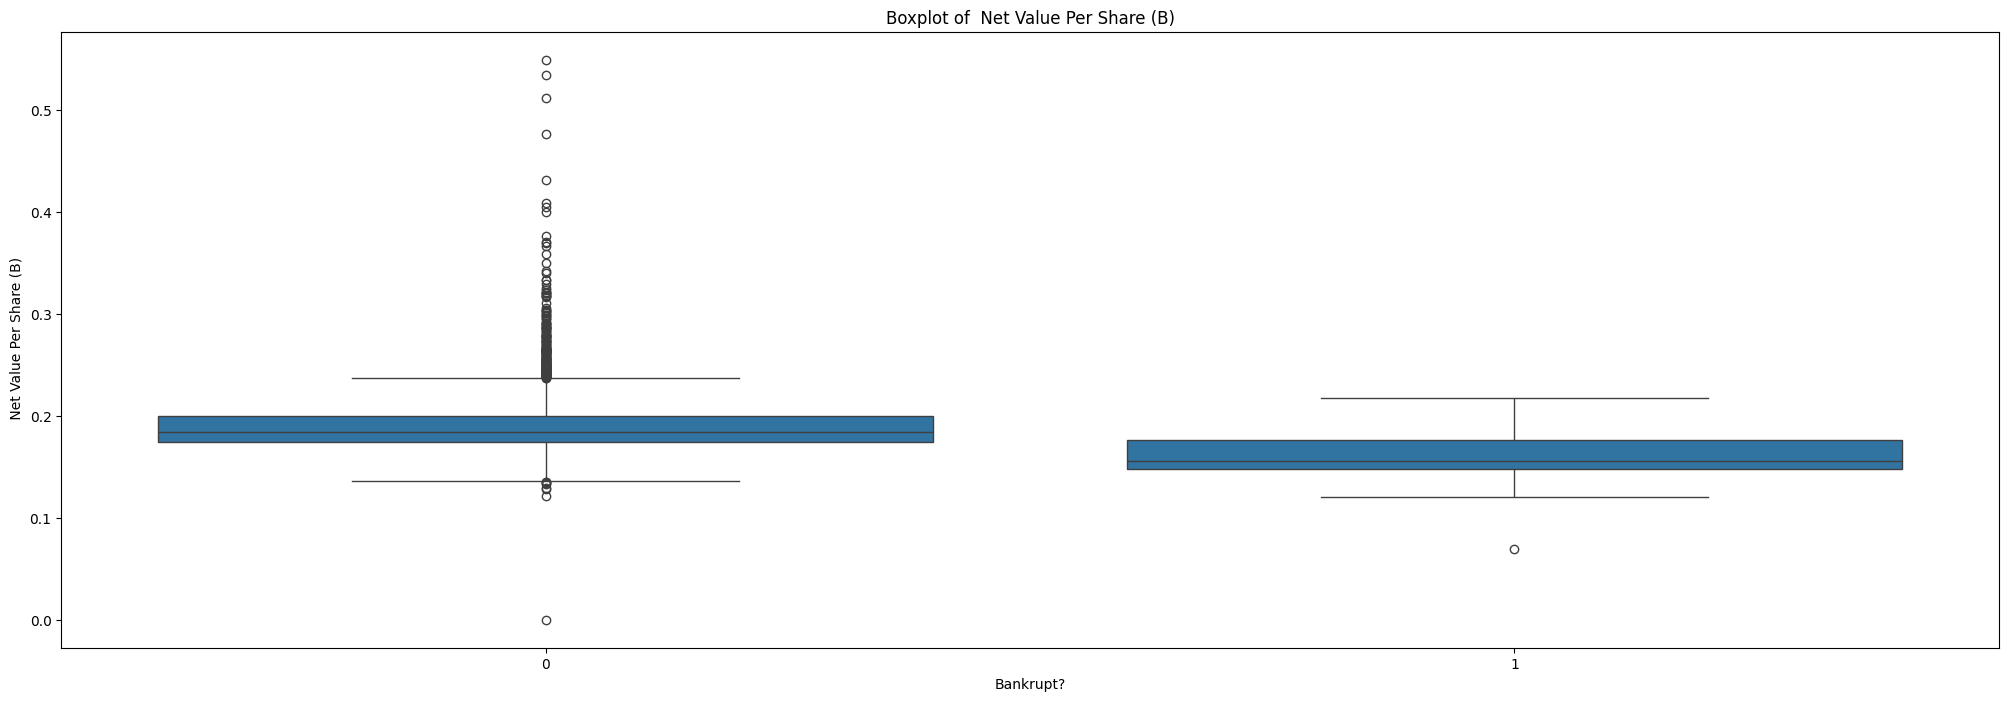

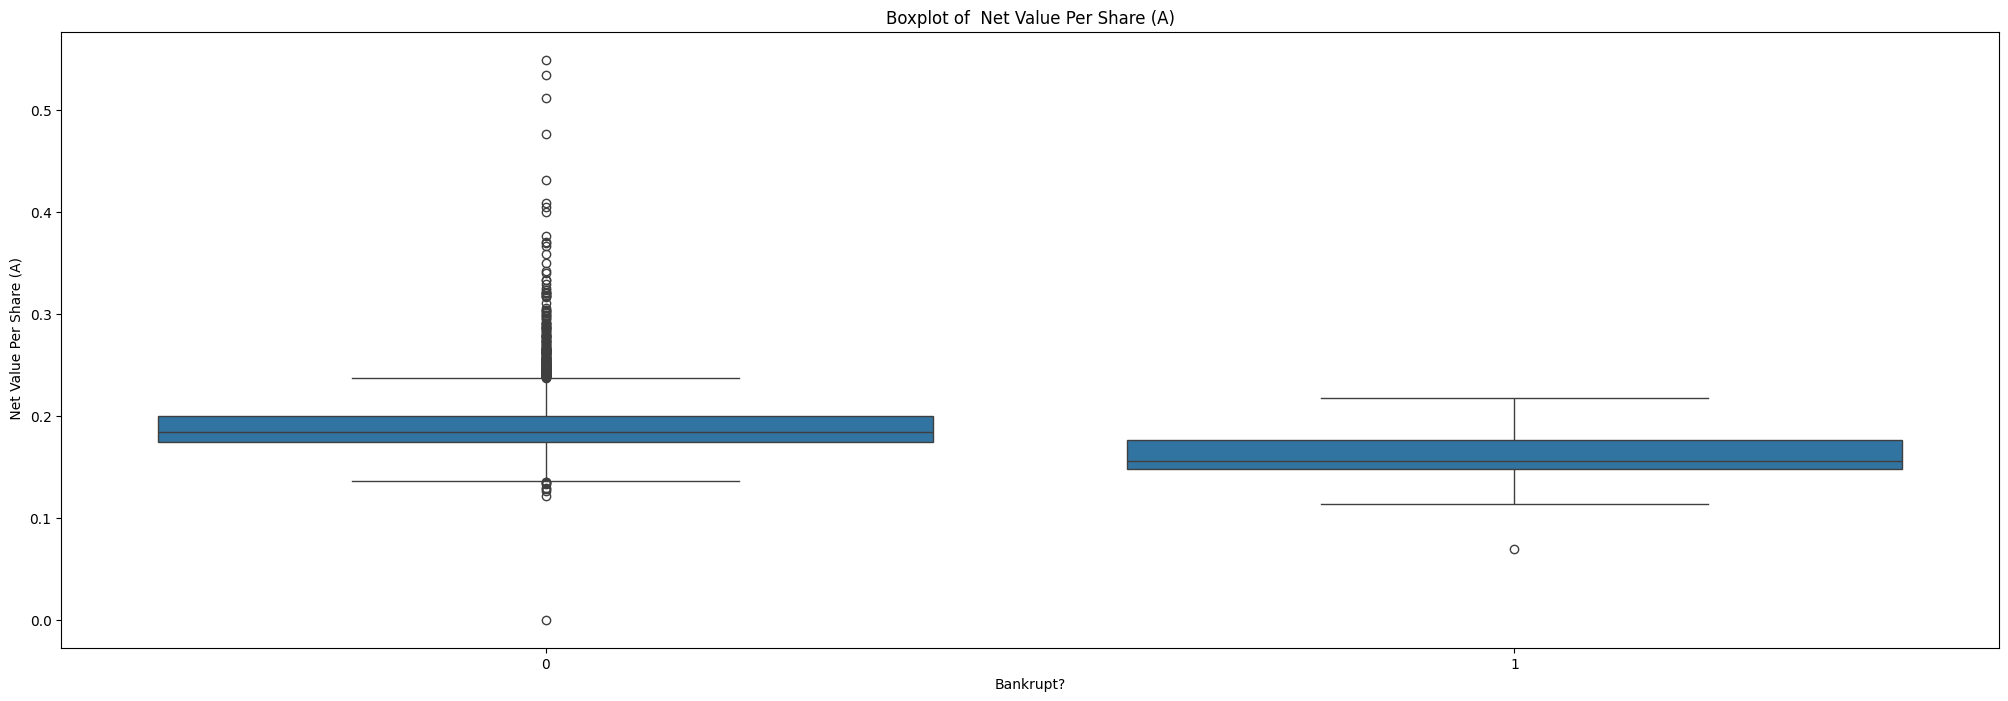

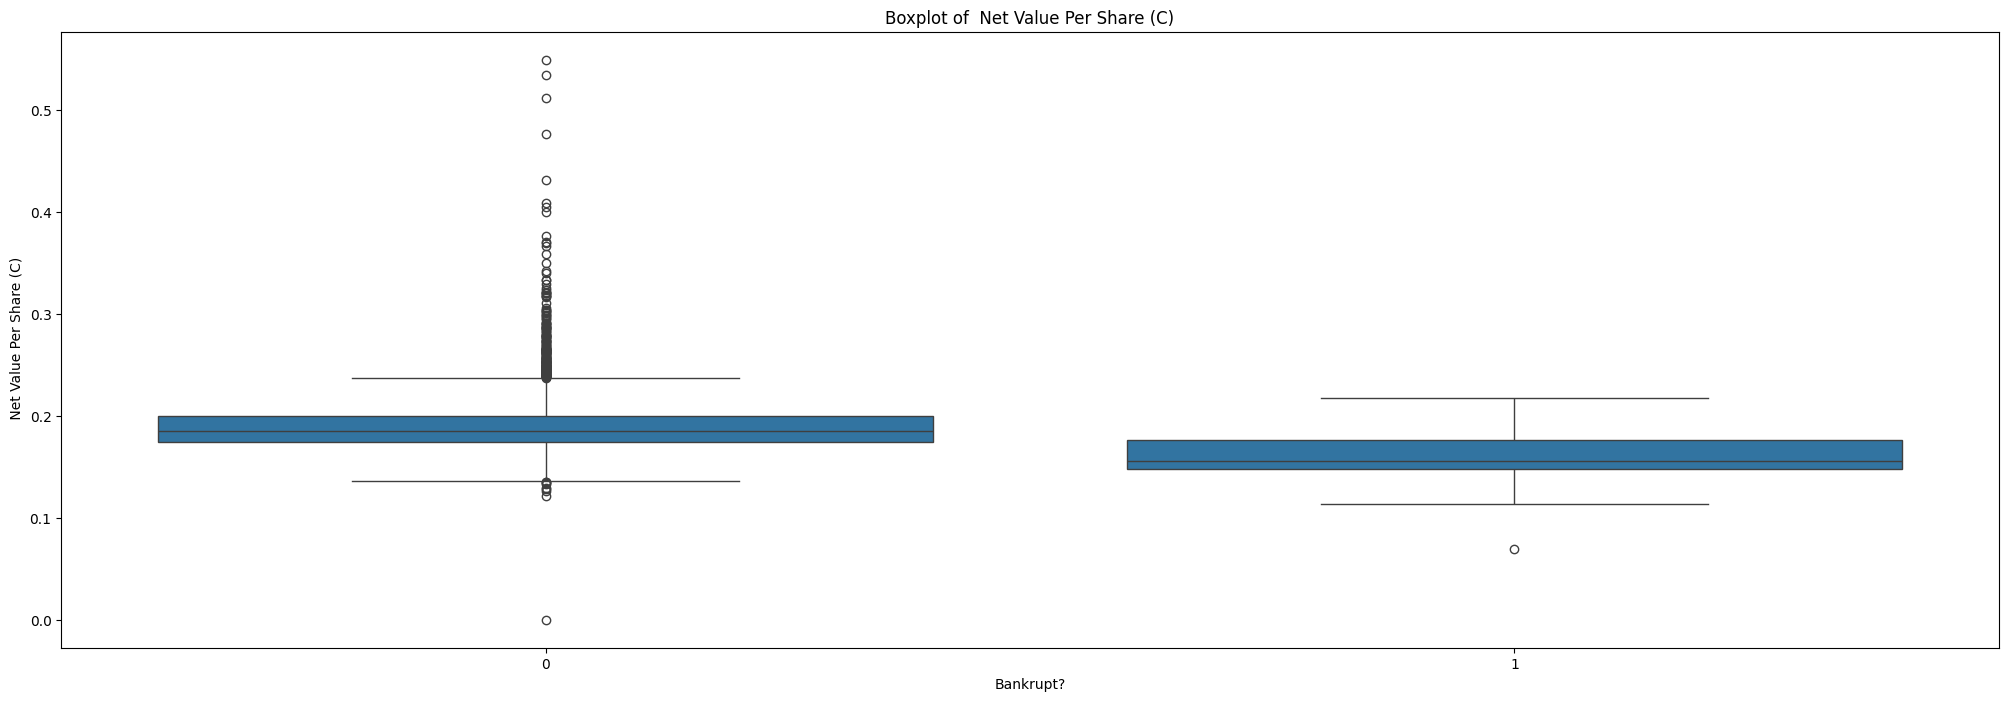

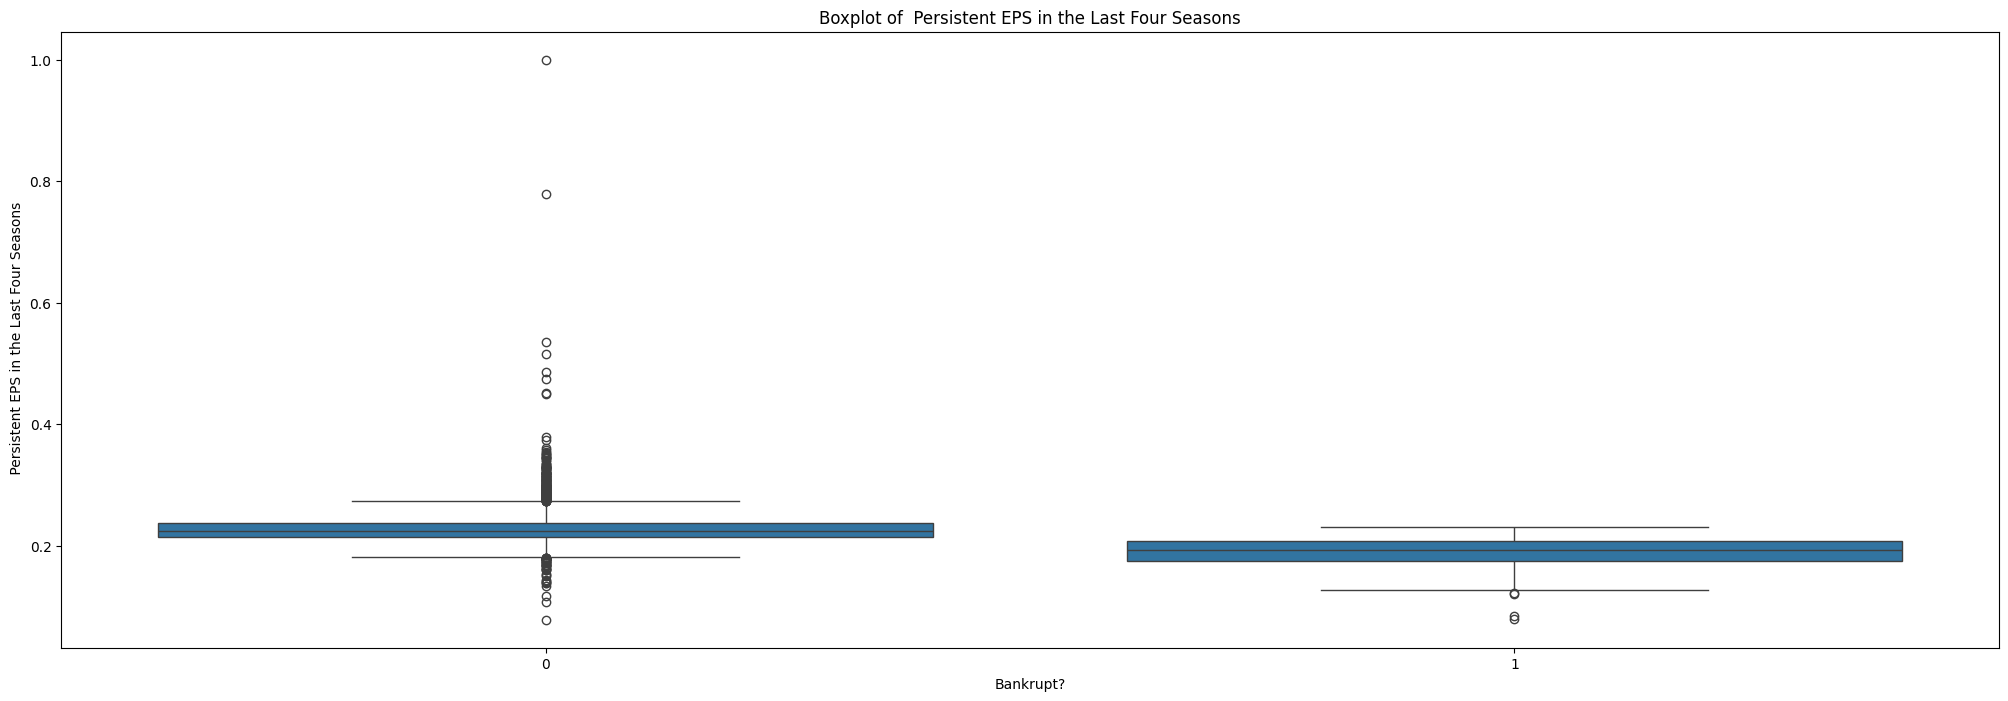

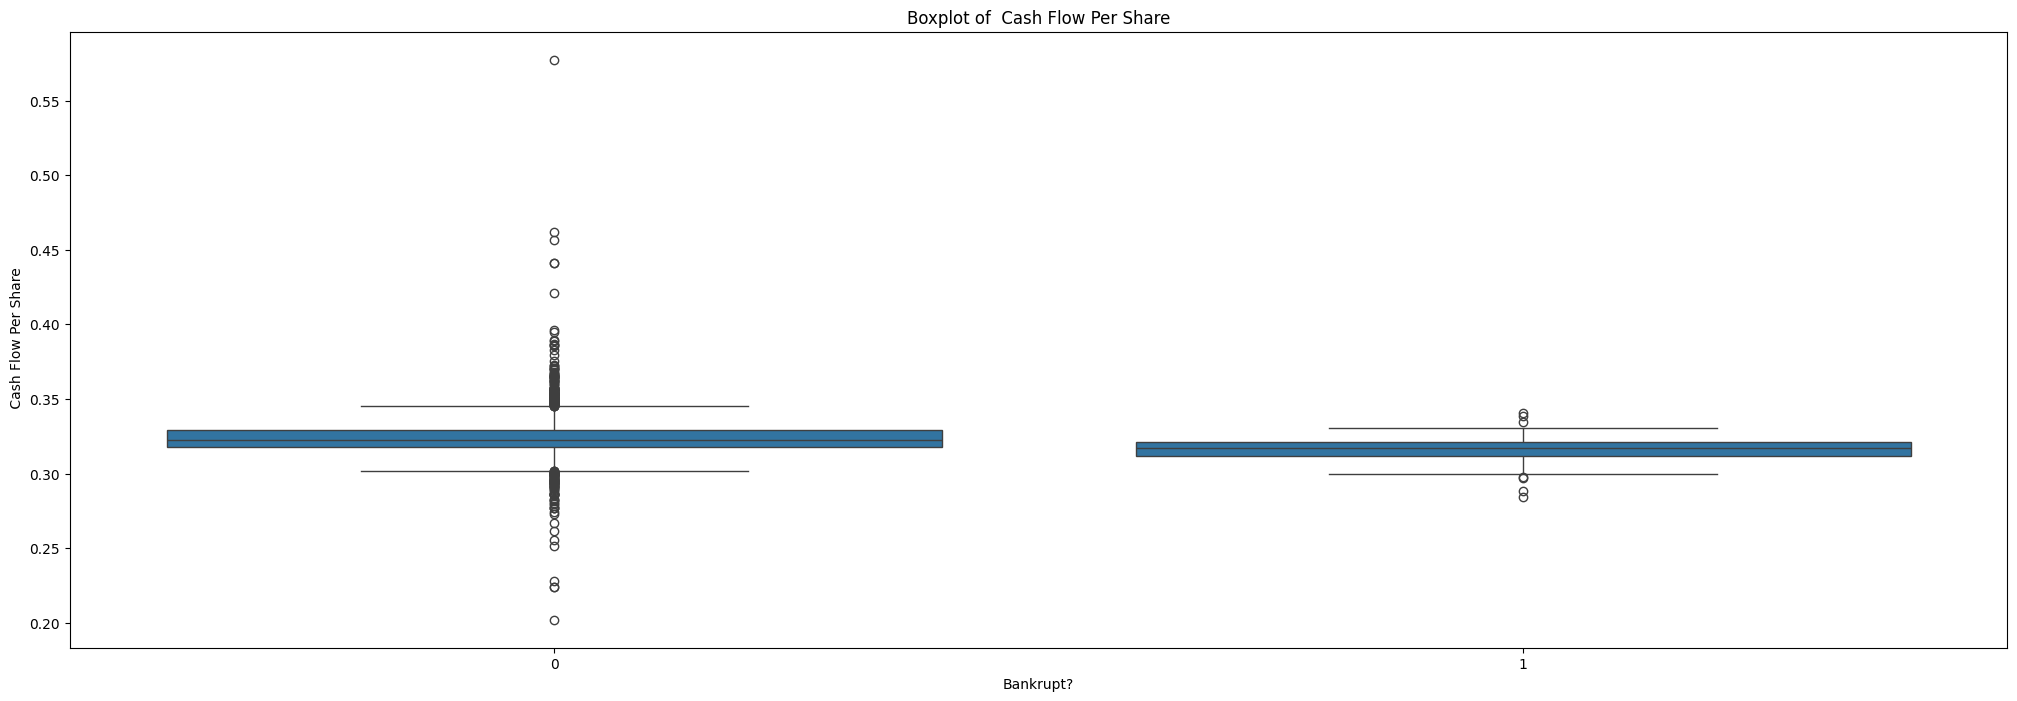

In [70]:
for i in range(10, 20):
    fig, ax = plt.subplots(figsize=(25,8))
    sns.boxplot(x=y_train, y=x_train[x_train.columns[i]], ax=ax)
    ax.set_title(f'Boxplot of {x_train.columns[i]}')
    plt.show()

oraz za pomocą heatmapy korelacji

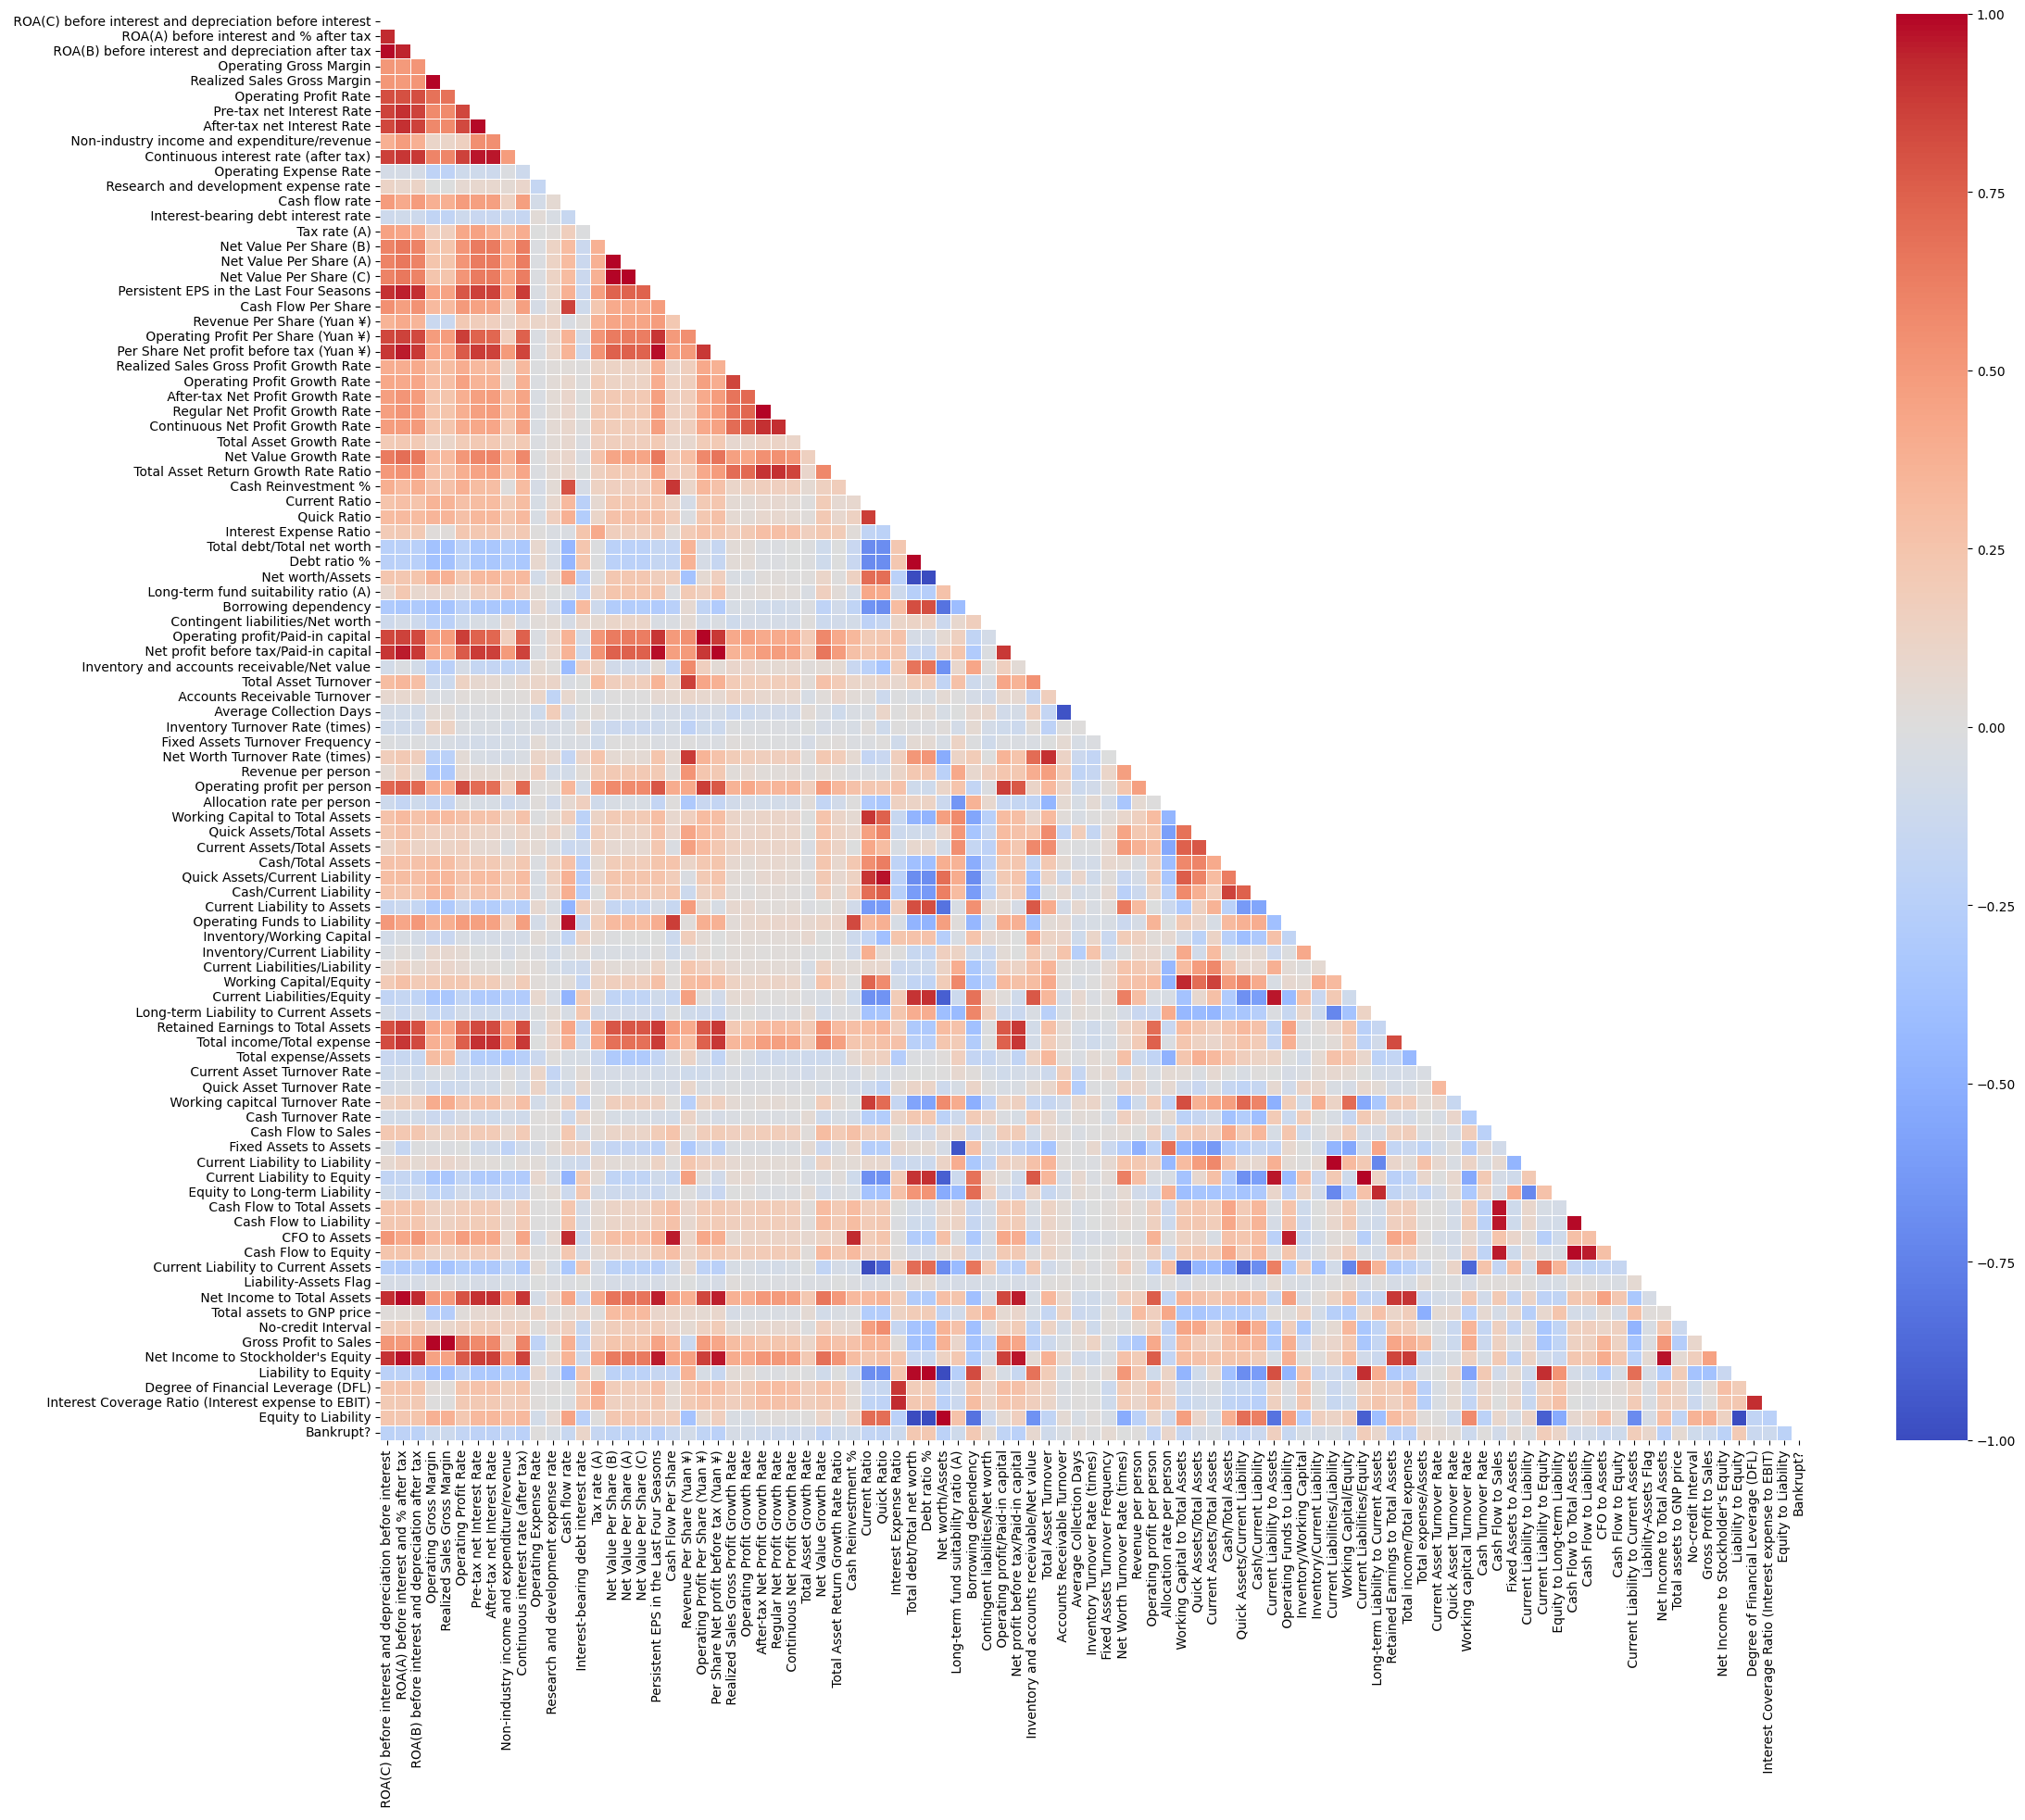

In [71]:
train_data = pd.concat([x_train, y_train], axis=1)
spearman_corr = train_data.corr('spearman')
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

plt.figure(figsize=(25, 20))
sns.heatmap(spearman_corr, mask=mask, square=True, linewidths=0.5, cmap='coolwarm')
plt.show()

Wizualizacja kilku ciekawych parametrów za pomocą boxplotów

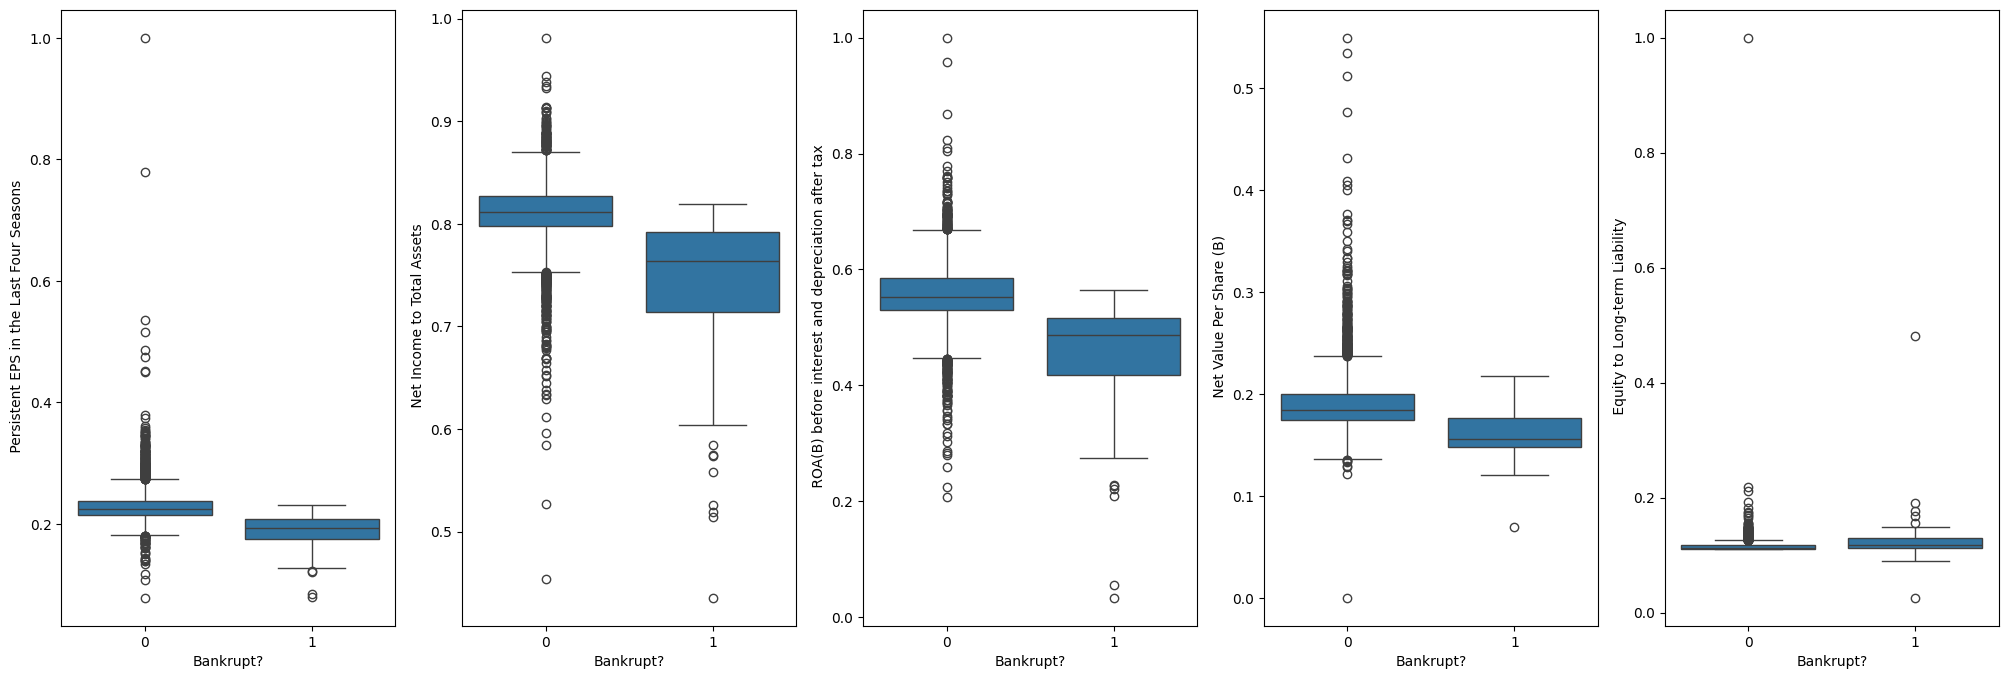

In [72]:
plt.subplots(ncols=5, figsize=(25,8))

sns.boxplot(x=y_train, y=x_train[" Persistent EPS in the Last Four Seasons"], ax=plt.subplot(1, 5, 1));
sns.boxplot(x=y_train, y=x_train[" Net Income to Total Assets"], ax=plt.subplot(1, 5, 2));
sns.boxplot(x=y_train, y=x_train[" ROA(B) before interest and depreciation after tax"], ax=plt.subplot(1, 5, 3));
sns.boxplot(x=y_train, y=x_train[" Net Value Per Share (B)"], ax=plt.subplot(1, 5, 4));
sns.boxplot(x=y_train, y=x_train[" Equity to Long-term Liability"], ax=plt.subplot(1, 5, 5));

## Preprocessing

### Obsługa outlierów

In [73]:
for column in x_train.columns:
    upper_lim = x_train[column].quantile(.99)
    lower_lim = x_train[column].quantile(.01)

    x_train.loc[x_train[column] > upper_lim, column] = upper_lim
    x_train.loc[x_train[column] < lower_lim, column] = lower_lim

    x_test.loc[x_test[column] > upper_lim, column] = upper_lim
    x_test.loc[x_test[column] < lower_lim, column] = lower_lim
    
    x_valid.loc[x_valid[column] > upper_lim, column] = upper_lim
    x_valid.loc[x_valid[column] < lower_lim, column] = lower_lim

### Normalizacja

In [74]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_valid = pd.DataFrame(scaler.transform(x_valid), columns=x_valid.columns)

### Wybór najważniejszych cech

In [75]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
perm_importance = permutation_importance(rf_model, x_train, y_train, n_repeats=100, random_state=42)

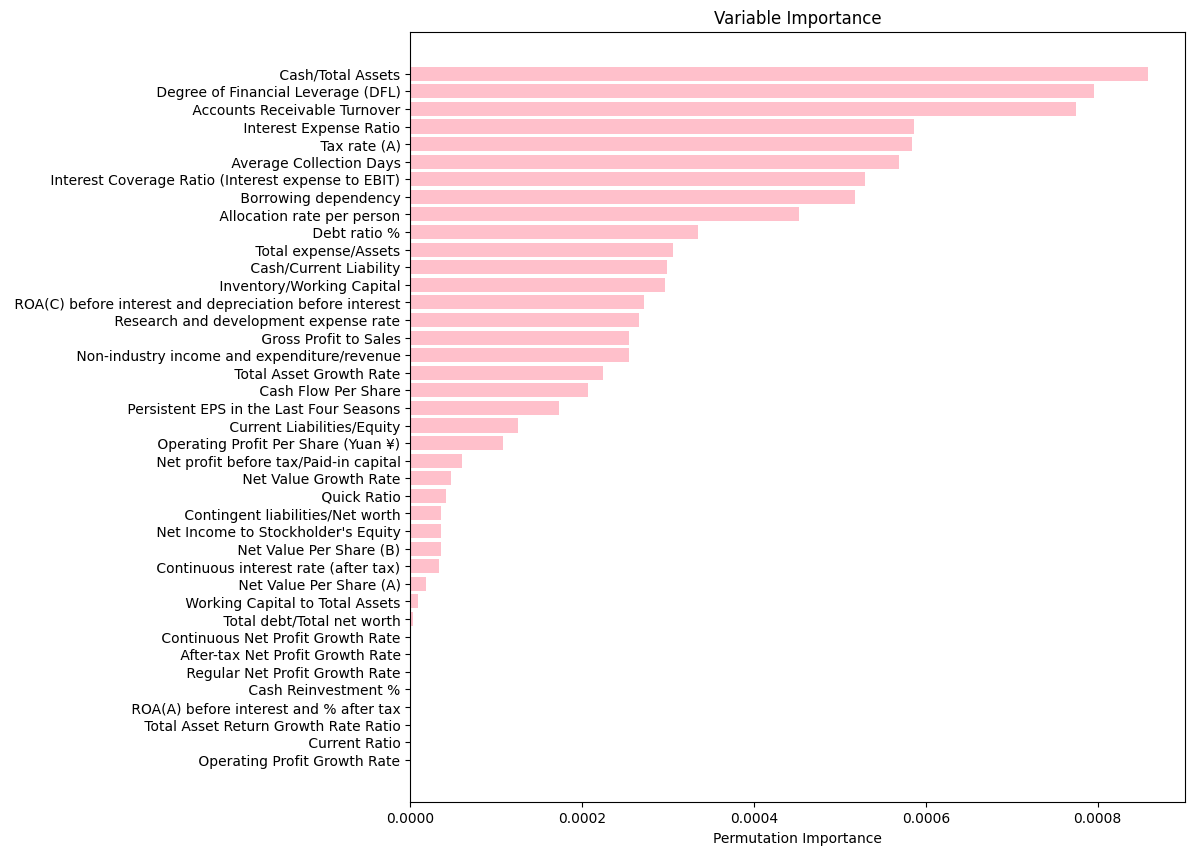

In [76]:
sorted_idx = perm_importance.importances_mean.argsort()
top_vars = 40

x_test = x_test[x_train.columns[sorted_idx][-top_vars:]]
x_valid = x_valid[x_train.columns[sorted_idx][-top_vars:]]
x_train = x_train[x_train.columns[sorted_idx][-top_vars:]]

plt.figure(figsize=(10, 10))
plt.barh(range(top_vars), perm_importance.importances_mean[sorted_idx][-top_vars:], color='pink')
plt.yticks(range(top_vars), x_train.columns)
plt.xlabel('Permutation Importance')
plt.title('Variable Importance')
plt.show()

## Modeling

In [77]:
def show_metrics(y_real, y_pred):    
    precision = precision_score(y_real, y_pred)
    accuracy = accuracy_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)

    roc_auc = roc_auc_score(y_real, y_pred)
    gini = 2 * roc_auc - 1

    print('-'*30)
    print(f'accuracy: {accuracy:.5f}')
    print(f'precision: {precision:.5f}')
    print(f'recall: {recall:.5f}')
    print(f'f1: {f1:.5f}')
    print('-'*30)
    print(f'ROC_AUC: {roc_auc:.5f}')
    print(f'GINI: {gini:.5f}')
    print('-'*30)

Ukrycie warningów związanych z niepoprawnym dobraniem parametrów do strojenia hiperparametrów

In [78]:
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### LogisticRegression

In [79]:
param_distributions = {
        'solver': ['newton-cg', 'lbfgs', 'sag', 'liblinear', 'saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'class_weight': ['balanced', None],
        'max_iter': list(range(100, 800, 100)),
    }


random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_distributions,
    scoring='roc_auc',
    n_iter=10,
    cv=5,
    random_state=420,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

log_reg_estimator = random_search.best_estimator_

In [80]:
y_pred_log_reg = log_reg_estimator.predict(x_test)
show_metrics(y_test, y_pred_log_reg)


------------------------------
accuracy: 0.87779
precision: 0.18537
recall: 0.82609
f1: 0.30279
------------------------------
ROC_AUC: 0.85280
GINI: 0.70560
------------------------------


### Random Forest

In [81]:
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_features' : ['sqrt', 'log2'],
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=420),
    param_distributions=param_distributions,
    scoring='roc_auc',
    n_iter=10,
    cv=5,
    random_state=420,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

rand_for_estimator = random_search.best_estimator_

In [82]:
y_pred_rand_for = rand_for_estimator.predict(x_test)
show_metrics(y_test, y_pred_rand_for)

------------------------------
accuracy: 0.95880
precision: 0.40299
recall: 0.58696
f1: 0.47788
------------------------------
ROC_AUC: 0.77905
GINI: 0.55810
------------------------------


### CatBoost

In [83]:
param_distributions = {
    'eval_metric': ['F1', 'AUC', 'Accuracy', 'Precision', 'Recall'],
    'iterations': [100, 500, 1000],
    'learning_rate' : [0.1, 0.01, 0.001],
    'auto_class_weights' : ['Balanced','SqrtBalanced'],
}

random_search = RandomizedSearchCV(
    CatBoostClassifier(random_state=42, verbose=0), 
    param_distributions=param_distributions,
    scoring='roc_auc',
    n_iter=10,
    cv=5,
    random_state=420,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

cat_estimator = random_search.best_estimator_

In [84]:
y_pred_cat = cat_estimator.predict(x_test)
show_metrics(y_test, y_pred_cat)

------------------------------
accuracy: 0.96020
precision: 0.41270
recall: 0.56522
f1: 0.47706
------------------------------
ROC_AUC: 0.76926
GINI: 0.53852
------------------------------


### SVC

In [85]:

param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None],
    'max_iter': list(range(100, 800, 100)),
}

random_search = RandomizedSearchCV(
    estimator=SVC(probability=True),
    param_distributions=param_distributions,
    scoring='roc_auc',
    n_iter=10,
    cv=5,
    random_state=420,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

svc_estimator = random_search.best_estimator_

In [86]:
y_pred_svc = svc_estimator.predict(x_test)
show_metrics(y_test, y_pred_svc)

------------------------------
accuracy: 0.89735
precision: 0.21143
recall: 0.80435
f1: 0.33484
------------------------------
ROC_AUC: 0.85239
GINI: 0.70478
------------------------------


## Results

### ROC Curve

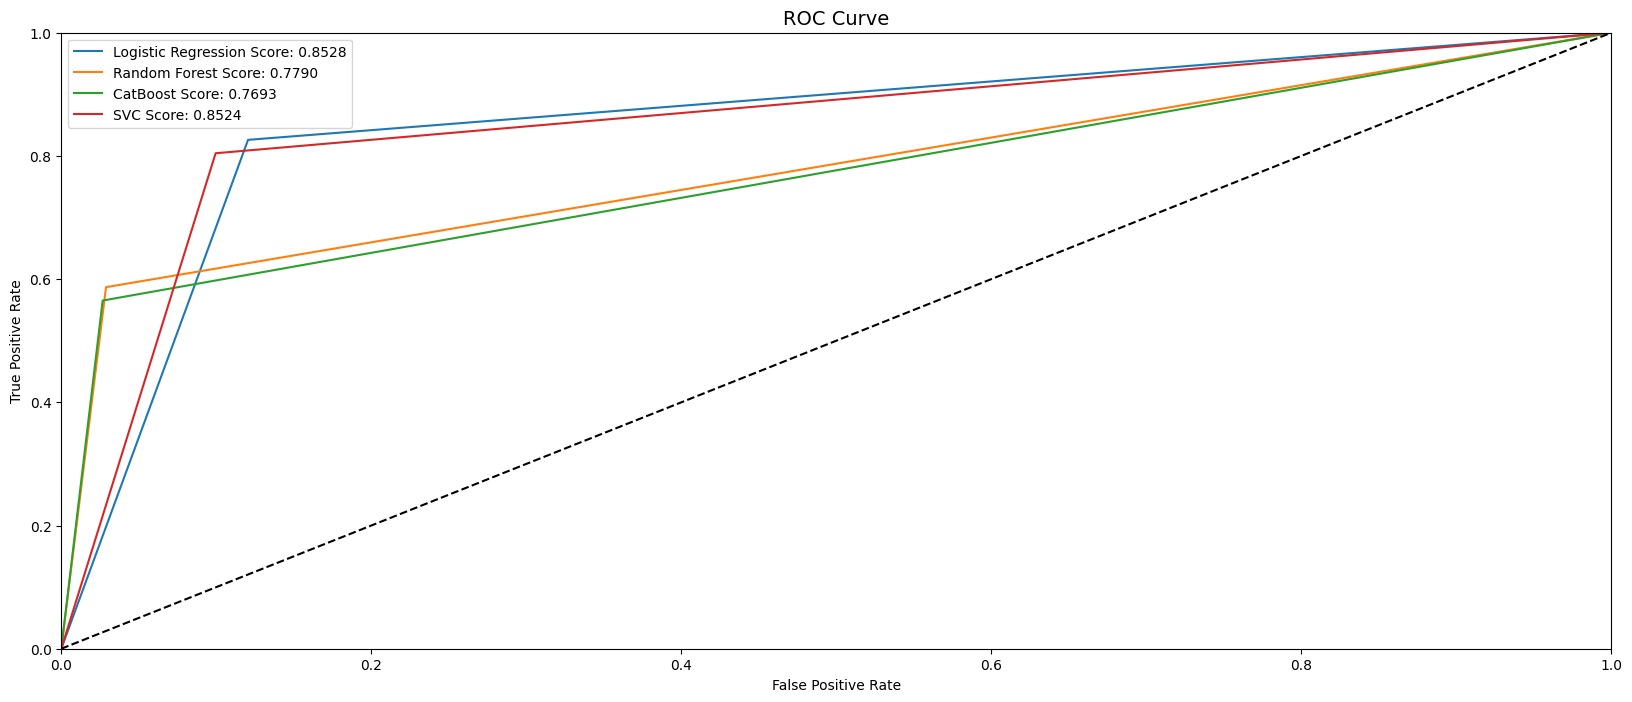

In [87]:
log_fpr, log_tpr, _ = roc_curve(y_test, y_pred_log_reg)
for_fpr, for_tpr, _ = roc_curve(y_test, y_pred_rand_for)
cat_fpr, cat_tpr, _ = roc_curve(y_test, y_pred_cat)
svc_fpr, svc_tpr, _ = roc_curve(y_test, y_pred_svc)


plt.figure(figsize=(20,8))
plt.title('ROC Curve', fontsize=14)
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression Score: {roc_auc_score(y_test, y_pred_log_reg):.4f}')
plt.plot(for_fpr, for_tpr, label=f'Random Forest Score: {roc_auc_score(y_test, y_pred_rand_for):.4f}')
plt.plot(cat_fpr, cat_tpr, label=f'CatBoost Score: {roc_auc_score(y_test, y_pred_cat):.4f}')
plt.plot(svc_fpr, svc_tpr, label=f'SVC Score: {roc_auc_score(y_test, y_pred_svc):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
    
plt.show()

### Confusion matrix

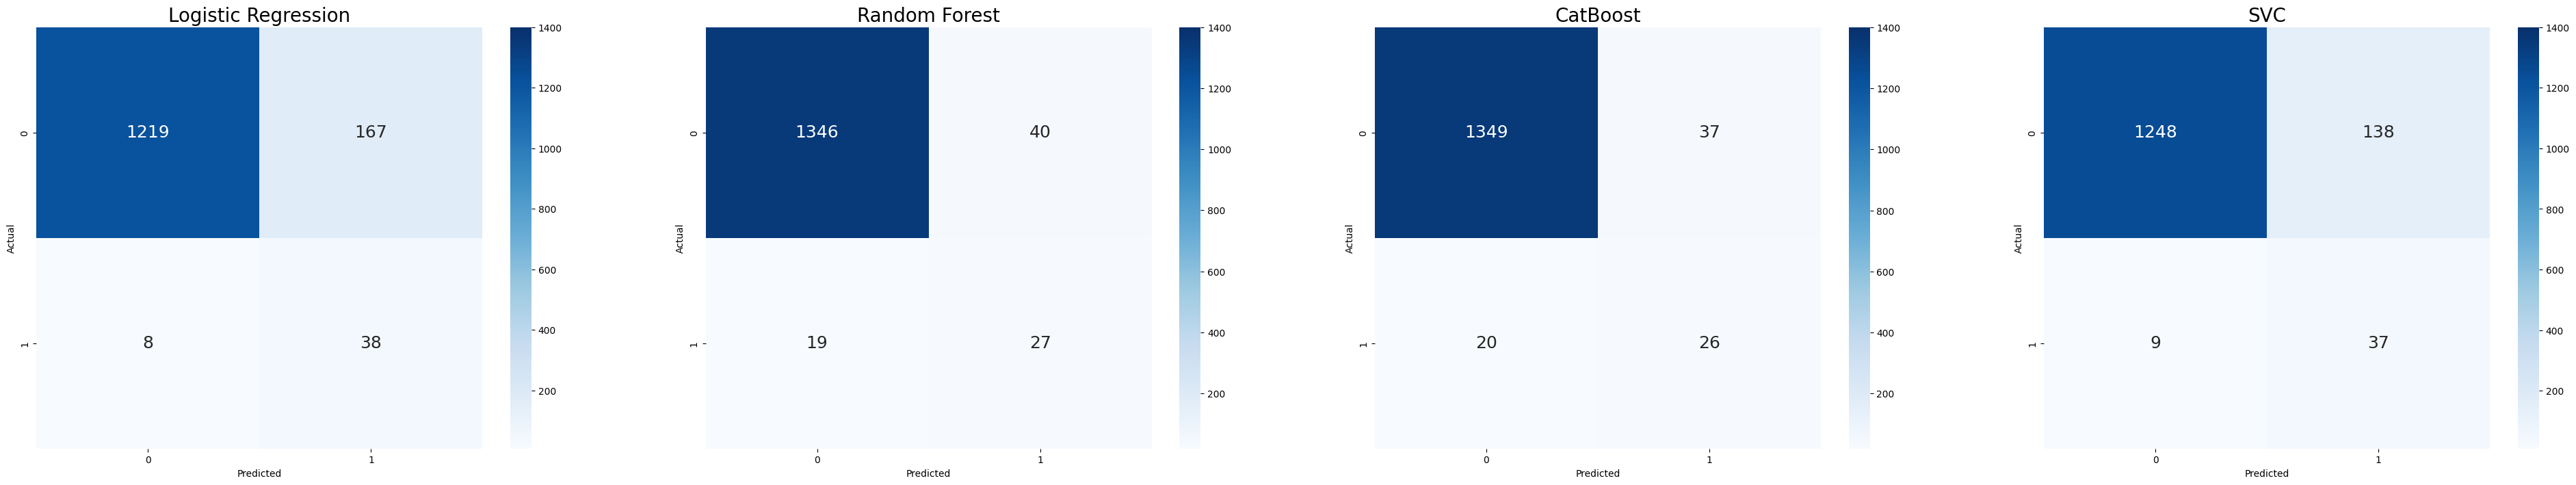

In [88]:
mx_log_reg = confusion_matrix(y_test, y_pred_log_reg)
mx_rand_for = confusion_matrix(y_test, y_pred_rand_for)
mx_cat = confusion_matrix(y_test, y_pred_cat)
mx_svc = confusion_matrix(y_test, y_pred_svc)

hm_log_reg = pd.DataFrame(mx_log_reg)
hm_rand_for = pd.DataFrame(mx_rand_for)
hm_cat = pd.DataFrame(mx_cat)
hm_svc = pd.DataFrame(mx_svc)

f, ax = plt.subplots(1, 4, figsize=(20,8))
f.subplots_adjust(right= 2)

sns.heatmap(hm_log_reg, cmap='Blues', annot=True, annot_kws={"size": 18}, fmt='g', vmax=1400, ax = ax[0])
ax[0].set(xlabel='Predicted', ylabel='Actual')
ax[0].set_title('Logistic Regression', fontsize=20)
sns.heatmap(hm_rand_for, cmap='Blues', annot=True, annot_kws={"size": 18}, fmt='g', vmax=1400, ax = ax[1])
ax[1].set(xlabel='Predicted', ylabel='Actual')
ax[1].set_title('Random Forest', fontsize=20)
sns.heatmap(hm_cat, cmap='Blues', annot=True, annot_kws={"size": 18}, fmt='g', vmax=1400, ax = ax[2])
ax[2].set(xlabel='Predicted', ylabel='Actual')
ax[2].set_title('CatBoost', fontsize=20)
sns.heatmap(hm_svc, cmap='Blues', annot=True, annot_kws={"size": 18}, fmt='g', vmax=1400, ax = ax[3])
ax[3].set(xlabel='Predicted', ylabel='Actual')
ax[3].set_title('SVC', fontsize=20)

plt.show()